In [1]:
import netCDF4 as nc
from salishsea_tools import tidetools, nc_tools
import matplotlib.pyplot as plt
import numpy as np
import os
import re

%matplotlib inline

resultsDir='/data/eolson/MEOPAR/SS2DSOGruns/'


In [2]:
TS=nc.Dataset(os.path.join(resultsDir,'TS_uniform.nc'))

In [3]:
# read z, T, S into CTD
CTD=np.loadtxt('/data/eolson/SOG/SOG-initial/ctd/SG-S3-2004-10-19.sog',skiprows=12,usecols=(1, 2, 8))

In [4]:
# add z=0 at first row, repeating T,S values from next level
data=np.vstack((CTD[0,:],CTD))
data[0,0]=0.
# interpolate to T-points
data_t=(data[0:101,:]+data[1:102,:])/2

In [5]:
# create temp and sal arrays with correct dimensions
vecTem=np.reshape(data_t[:,1],(101,1,1))
data_Tem=np.tile(vecTem,(1,1,5,5))
vecSal=np.reshape(data_t[:,2],(101,1,1))
data_Sal=np.tile(vecSal,(1,1,5,5))
print data_Sal.shape

(1, 101, 5, 5)


In [6]:
new_TS=nc.Dataset('/data/eolson/MEOPAR/SS2DSOGruns/TS_5x5_SG-S3-2014-10-19.nc','w')
new_TS.createDimension('y', 5)
new_TS.createDimension('x', 5)
new_TS.createDimension('deptht', 101)
new_TS.createDimension('time_counter', None)

nc_tools.show_dimensions(TS)
nc_tools.show_dimensions(new_TS)

<type 'netCDF4.Dimension'>: name = 'y', size = 10

<type 'netCDF4.Dimension'>: name = 'x', size = 1100

<type 'netCDF4.Dimension'>: name = 'deptht', size = 40

<type 'netCDF4.Dimension'> (unlimited): name = 'time_counter', size = 1

<type 'netCDF4.Dimension'>: name = 'y', size = 5

<type 'netCDF4.Dimension'>: name = 'x', size = 5

<type 'netCDF4.Dimension'>: name = 'deptht', size = 101

<type 'netCDF4.Dimension'> (unlimited): name = 'time_counter', size = 0



In [7]:
new_tc=new_TS.createVariable('time_counter',float,('time_counter'),zlib=True)
new_tc.setncattr('units',TS.variables['time_counter'].units)
new_tc.setncattr('long_name',TS.variables['time_counter'].long_name)
new_tc[:]=TS.variables['time_counter']

print TS.variables['time_counter']
print new_TS.variables['time_counter']

<type 'netCDF4.Variable'>
float32 time_counter(time_counter)
    units: seconds since 2003-08-09 0:00:00
    long_name: Time axis
unlimited dimensions: time_counter
current shape = (1,)
filling on, default _FillValue of 9.96920996839e+36 used

<type 'netCDF4.Variable'>
float64 time_counter(time_counter)
    units: seconds since 2003-08-09 0:00:00
    long_name: Time axis
unlimited dimensions: time_counter
current shape = (1,)
filling on, default _FillValue of 9.96920996839e+36 used



In [8]:
new_z=new_TS.createVariable('deptht',float,('deptht'),zlib=True)
new_z.setncattr('units',TS.variables['deptht'].units)
new_z.setncattr('long_name',TS.variables['deptht'].long_name)
new_z.setncattr('positive',TS.variables['deptht'].positive)
new_z[:]=data_t[:,0]

print TS.variables['deptht']
print new_TS.variables['deptht']

<type 'netCDF4.Variable'>
float32 deptht(deptht)
    long_name: Depth
    units: m
    positive: down
unlimited dimensions: 
current shape = (40,)
filling on, default _FillValue of 9.96920996839e+36 used

<type 'netCDF4.Variable'>
float64 deptht(deptht)
    units: m
    long_name: Depth
    positive: down
unlimited dimensions: 
current shape = (101,)
filling on, default _FillValue of 9.96920996839e+36 used



In [9]:
new_x=new_TS.createVariable('x',float,('y','x'),zlib=True)
new_x.setncattr('units',TS.variables['x'].units)
new_x.setncattr('long_name',TS.variables['x'].long_name)
new_x[:]=TS.variables['x'][0:5,0:5]

print TS.variables['x']
print new_TS.variables['x']

<type 'netCDF4.Variable'>
float32 x(y, x)
    long_name: streamwise
    units: metres
unlimited dimensions: 
current shape = (10, 1100)
filling on, default _FillValue of 9.96920996839e+36 used

<type 'netCDF4.Variable'>
float64 x(y, x)
    units: metres
    long_name: streamwise
unlimited dimensions: 
current shape = (5, 5)
filling on, default _FillValue of 9.96920996839e+36 used



In [10]:
new_y=new_TS.createVariable('y',float,('y','x'),zlib=True)
new_y.setncattr('units',TS.variables['y'].units)
new_y.setncattr('long_name',TS.variables['y'].long_name)
new_y[:]=TS.variables['y'][0:5,0:5]

print TS.variables['y']
print new_TS.variables['y']

<type 'netCDF4.Variable'>
float32 y(y, x)
    long_name: spanwise
    units: metres
unlimited dimensions: 
current shape = (10, 1100)
filling on, default _FillValue of 9.96920996839e+36 used

<type 'netCDF4.Variable'>
float64 y(y, x)
    units: metres
    long_name: spanwise
unlimited dimensions: 
current shape = (5, 5)
filling on, default _FillValue of 9.96920996839e+36 used



In [11]:
new_Tem=new_TS.createVariable('votemper',float,('time_counter','deptht','y','x'),zlib=True)
new_Tem.setncattr('units',TS.variables['votemper'].units)
new_Tem.setncattr('long_name',TS.variables['votemper'].long_name)
new_Tem.setncattr('coordinates',TS.variables['votemper'].coordinates)
new_Tem[:,:,:,:]=data_Tem
print TS.variables['votemper']
print new_TS.variables['votemper']

<type 'netCDF4.Variable'>
float32 votemper(time_counter, deptht, y, x)
    units: degC
    long_name: Temperature
    coordinates: nav_lon nav_lat deptht time_counter
unlimited dimensions: time_counter
current shape = (1, 40, 10, 1100)
filling on, default _FillValue of 9.96920996839e+36 used

<type 'netCDF4.Variable'>
float64 votemper(time_counter, deptht, y, x)
    units: degC
    long_name: Temperature
    coordinates: nav_lon nav_lat deptht time_counter
unlimited dimensions: time_counter
current shape = (1, 101, 5, 5)
filling on, default _FillValue of 9.96920996839e+36 used



In [12]:
new_Sal=new_TS.createVariable('vosaline',float,('time_counter','deptht','y','x'),zlib=True)
new_Sal.setncattr('units',TS.variables['vosaline'].units)
new_Sal.setncattr('long_name',TS.variables['vosaline'].long_name)
new_Sal.setncattr('coordinates',TS.variables['vosaline'].coordinates)
new_Sal[:,:,:,:]=data_Sal
print TS.variables['vosaline']
print new_TS.variables['vosaline']

<type 'netCDF4.Variable'>
float32 vosaline(time_counter, deptht, y, x)
    units: none
    long_name: Practical Salinity
    coordinates: x y deptht time_counter
    grid: 2D bathy
unlimited dimensions: time_counter
current shape = (1, 40, 10, 1100)
filling on, default _FillValue of 9.96920996839e+36 used

<type 'netCDF4.Variable'>
float64 vosaline(time_counter, deptht, y, x)
    units: none
    long_name: Practical Salinity
    coordinates: x y deptht time_counter
unlimited dimensions: time_counter
current shape = (1, 101, 5, 5)
filling on, default _FillValue of 9.96920996839e+36 used



In [13]:
new_TS.title="""SS2DSOG 5x5 T+S initialization"""
new_TS.institution="""
Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia"""
new_TS.comment= """
Based on SG-S3-2004-10-19.sog"""
new_TS.reference= """
eolson: TS_SS2DSOG5x5_SG-S3-2004-10-19.ipynb"""

In [14]:
nc_tools.show_dataset_attrs(new_TS)

file format: NETCDF4
title: SS2DSOG 5x5 T+S initialization
institution: 
Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia
comment: 
Based on SG-S3-2004-10-19.sog
reference: 
eolson: TS_SS2DSOG5x5_SG-S3-2004-10-19.ipynb


In [15]:
new_TS.close()

In [16]:
TS.close()

<matplotlib.colorbar.Colorbar instance at 0x7fd4fc8e7b00>

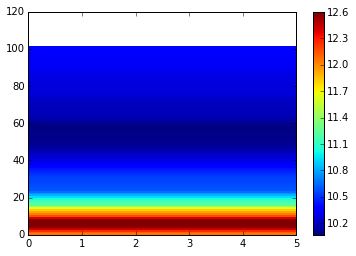

In [19]:
B=nc.Dataset('/data/eolson/MEOPAR/SS2DSOGruns/TS_5x5_SG-S3-2014-10-19.nc')
tem=B.variables['votemper']
sal=B.variables['vosaline']
plt.pcolormesh(tem[0,:,:,3]); plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7fd4fc718098>

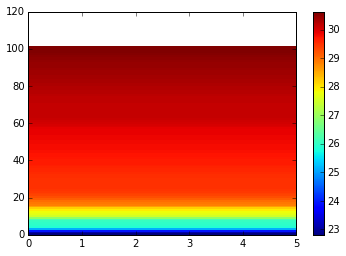

In [20]:

plt.pcolormesh(sal[0,:,:,3]); plt.colorbar()

In [21]:
print B.variables

OrderedDict([(u'time_counter', <netCDF4.Variable object at 0x7fd4fcab0c30>), (u'deptht', <netCDF4.Variable object at 0x7fd4fcab0b00>), (u'x', <netCDF4.Variable object at 0x7fd4fcab0df8>), (u'y', <netCDF4.Variable object at 0x7fd4fcab0e90>), (u'votemper', <netCDF4.Variable object at 0x7fd4fcab0f28>), (u'vosaline', <netCDF4.Variable object at 0x7fd4fca3e050>)])


In [22]:
B.close()